# This is a GALPY tutorial


## Firstly let's look at potentials

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import galpy.potential
%pylab inline

Populating the interactive namespace from numpy and matplotlib


To print all available potentials, and functions to manipulate them
(all should have their own page in the docs.)

In [2]:
print ([p for p in dir(galpy.potential) if 'Potential' in p])

['BurkertPotential', 'CorotatingRotationWrapperPotential', 'CosmphiDiskPotential', 'DehnenBarPotential', 'DehnenSmoothWrapperPotential', 'DiskSCFPotential', 'DoubleExponentialDiskPotential', 'EllipsoidalPotential', 'EllipticalDiskPotential', 'FerrersPotential', 'FlattenedPowerPotential', 'GaussianAmplitudeWrapperPotential', 'HenonHeilesPotential', 'HernquistPotential', 'InterpSnapshotRZPotential', 'IsochronePotential', 'JaffePotential', 'KGPotential', 'KeplerPotential', 'KuzminDiskPotential', 'KuzminKutuzovStaeckelPotential', 'LogarithmicHaloPotential', 'LopsidedDiskPotential', 'MN3ExponentialDiskPotential', 'MWPotential', 'MWPotential2014', 'MiyamotoNagaiPotential', 'MovingObjectPotential', 'NFWPotential', 'PerfectEllipsoidPotential', 'PlummerPotential', 'Potential', 'PotentialError', 'PowerSphericalPotential', 'PowerSphericalPotentialwCutoff', 'PseudoIsothermalPotential', 'RZToplanarPotential', 'RZToverticalPotential', 'RazorThinExponentialDiskPotential', 'RingPotential', 'SCFPotenti

Some are combinations of other potentials, for example, MWPotential2014 (which is an axisymmetric potential fit to Milky Way data; see galpy paper for details) is constucted from a NFW halo, a Miyamoto-Nagai disc, and a power sphere bulge

In [3]:
from galpy.potential import MWPotential2014
print (MWPotential2014)

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x000001559C8003C8>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x000001559C800400>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x000001559E168390>]


You can plot the rotation curve for the resulting Galactic potential, and find values for parameters such as vcirc at some Radius.

0.9217689827585458


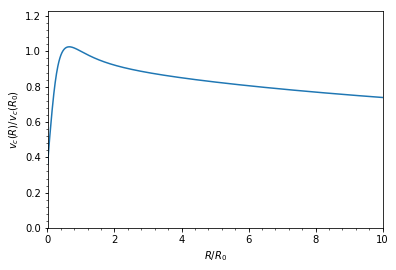

In [4]:
from galpy.potential import plotRotcurve, vcirc
plotRotcurve(MWPotential2014,Rrange=[0.01,10.],grid=1000.)
print (vcirc(MWPotential2014,2.)) # at twice the Solar radius

Or, we can construct out own Milky Way like potential by combining different components
Note that the normalize values add up to 1. such that the circular velocity will be 1 at R=1. 

In [5]:
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6)
nfp= NFWPotential(a=4.5,normalize=.35)
hp= HernquistPotential(a=0.6/8,normalize=0.05)
pot=[]
pot.append(mp)
pot.append(nfp)
pot.append(hp)

You can plot the rotation curve of the individual components, or the composite

0.9896889180519812


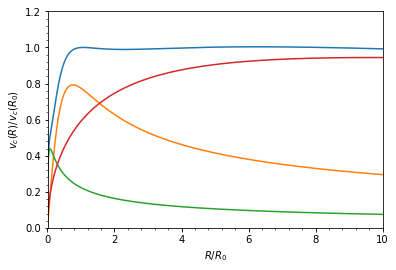

In [6]:
plotRotcurve(pot,Rrange=[0.01,10.],grid=1000.)
plotRotcurve(mp,Rrange=[0.01,10.],grid=1000.,overplot=True)
plotRotcurve(hp,Rrange=[0.01,10.],grid=1000.,overplot=True)
plotRotcurve(nfp,Rrange=[0.01,10.],grid=1000.,overplot=True)
print (vcirc(pot,2.))

You can also just evaluate the potential at some location, or plot it

-1.3733506513947895
-4.552578040219292
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)



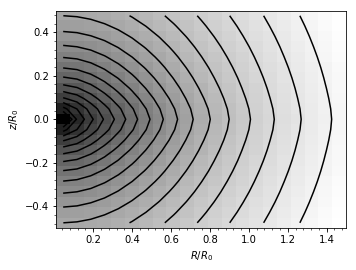

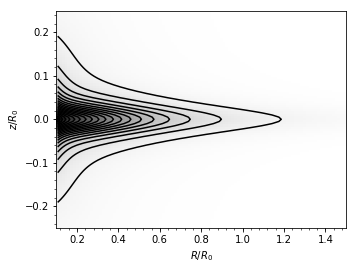

In [7]:
from galpy.potential import evaluatePotentials, plotPotentials, plotDensities
print (evaluatePotentials(MWPotential2014,1.,0.))
print (evaluatePotentials(pot,1.,0.))
plotPotentials(pot,rmin=0.01)
plotDensities(pot,rmin=0.1,zmax=0.25,zmin=-0.25,nrs=101,nzs=101)

# Now, let's orbit some particles in the potential. 
We shall pass Orbit() a six-dimensional initial condition [R,vR,vT,z,vz,phi], assuming we are dealing with a three-dimensional axisymmetric potential. We then integrate the orbit for a set of times ts

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


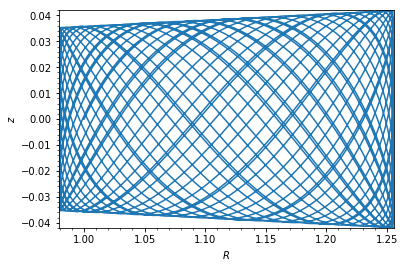

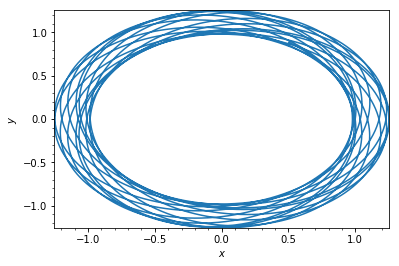

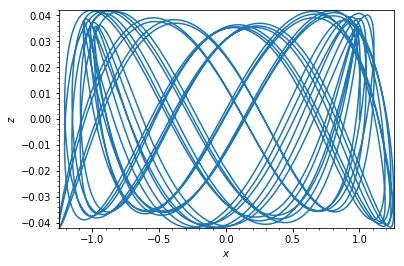

In [8]:
from galpy.orbit import Orbit
o=Orbit(vxvv=[1.,0.1,1.1,0.,0.1,0.])
ts=numpy.linspace(0,100,10000)
o.integrate(ts,pot,method='odeint')
o.plot()
o.plot(d1='x',d2='y')
o.plot(d1='x',d2='z')

We can also make animations (probably)

In [9]:
o.animate()

Or, up to three simulateous projections of the orbit

In [10]:
o.animate(d1=['x','x','R'],d2=['y','z','z'],width=800)

You can also pull out the orbital properties, e.g. apocentre, pericentre, eccentricity, zmax, and energy

In [11]:
print ('Apocentre=',o.rap(),'Pericentre=',o.rperi(),'Eccentricity=',o.e(),'Max height=',o.zmax(),'Energy=',o.E())

Apocentre= 1.255731520396048 Pericentre= 0.97956299980763 Eccentricity= 0.12354905274999456 Max height= 0.041974959982711404 Energy= -3.9375780402192926


This is still an axisymmetric potential, but we can also add non-axisymmetric, time varying components, such as a bar or spiral structure. The bar is grown smoothly from tform=0 (in bar periods) for tsteady=5 bar periods unsing in built functionality. The spiral arms must be grown using the DehnenSmoothWrapperPotential where we use the same formation time of the bar: dp.tform()

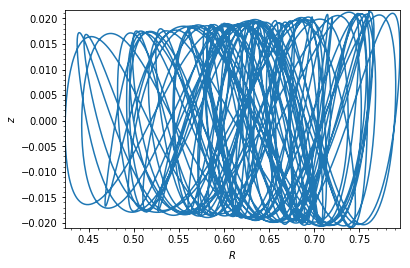

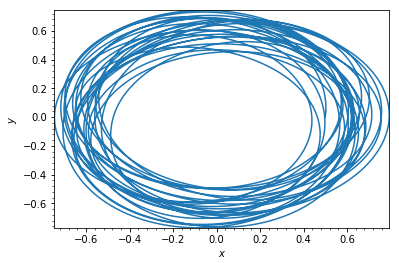

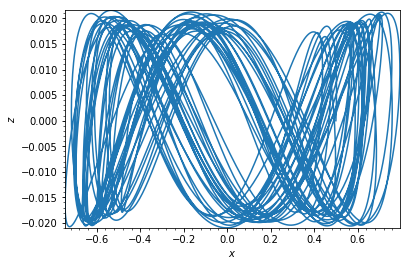

In [12]:
from galpy.potential import DehnenBarPotential, SpiralArmsPotential, DehnenSmoothWrapperPotential
dp=DehnenBarPotential(omegab=1.3,rb=5./8.,Af=(2./75.),tform=0,tsteady=5,barphi=25/180.*numpy.pi)
sp=DehnenSmoothWrapperPotential(\
                pot=SpiralArmsPotential(N=4,amp=1.,phi_ref=np.pi/4.,alpha=np.deg2rad(12.),omega=0.91),tform=dp.tform(),tsteady=5)
pot.append(dp)
pot.append(sp)
o2=Orbit(vxvv=[0.5,0.1,1.1,0.,0.1,0.])
o2.integrate(ts,pot,method='odeint')
o2.plot()
o2.plot(d1='x',d2='y')
o2.plot(d1='x',d2='z')

You can also initialise orbits by name of object (for most major objects, requires the astroquery package & you need to match the name in Simbad). For example, if we want to see the orbit of Omega Cen, you can do:

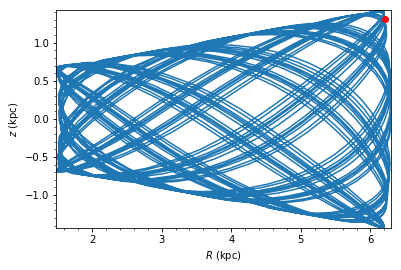

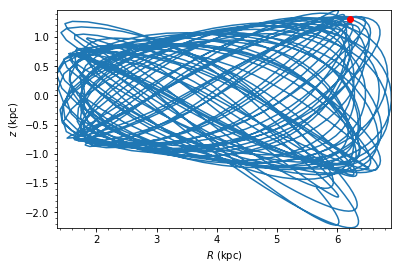

In [14]:
o3= Orbit.from_name('Omega Cen')
ts= numpy.linspace(0.,100.,2001)
o3.integrate(ts,MWPotential2014)
o3.plot()
plot([o3.R()],[o3.z()],'ro') # <- Plot position at the current day
# Or in the constructed potential
o4= Orbit.from_name('Omega Cen')
ts= numpy.linspace(0.,100.,2001)
o4.integrate(ts,pot)
o4.plot()
plot([o4.R()],[o4.z()],'ro')

But sometimes it doesn't work (why? No idea!) and you set manually, or you want a non-named orbit in observational coordinates. This is done by Orbit(vxvv=[RA,Dec,distance,pmRA,pmDec,Vlos],radec=True)

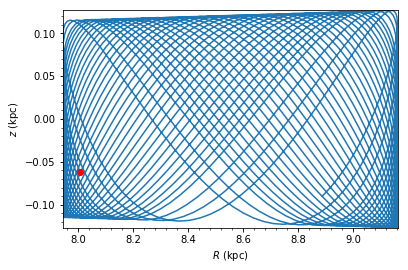

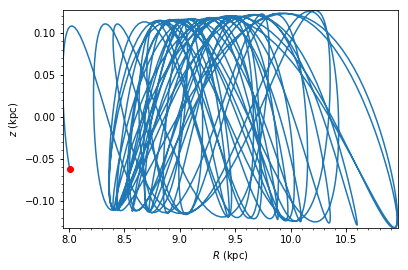

In [15]:
o6=Orbit(vxvv=[0.5,0.31,0.1,0.03,0.01,0.01],radec=True)
ts= numpy.linspace(0.,100.,2001)
o6.integrate(ts,MWPotential2014)
o6.plot()
plot([o6.R()],[o6.z()],'ro')
o7=Orbit(vxvv=[0.5,0.31,0.1,0.03,0.01,0.01],radec=True)
o7.integrate(ts,pot)
o7.plot()
plot([o7.R()],[o7.z()],'ro')

In [16]:
o7.animate(d1=['x','x','R'],d2=['y','z','z'],width=800)

At some point (very soon apparently) orbit will be upgraded to handle multiple orbits simultaneously (for those who are proficient with python/galpy it's in the orbits branch)

# Calculation of parameters for lots of stars (or model particles etc.)
As well as the analysis of individual orbits, GALPY has lots of functionality for calculating parameters for a lot of stars. E.g. coordinate transforms, or calculation of actions/angles/frequencies etc. To demonstrate this we'll need some data. Let's use astroquery to select some nearby stars with good distances.

In [17]:
from astroquery.gaia import Gaia
job = Gaia.launch_job_async(
"""select top 3000 ra,dec,parallax,pmra,pmdec,radial_velocity """
"""from gaiadr2.gaia_source """
"""where radial_velocity>-1000 and pmra>-1000 and parallax>5 and parallax_error/parallax<0.1""" )
gaia = job.get_results();

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Query finished.


We can now use bovy_coords to transform them easily to other coordinate systems (see http://jobovy.github.io/galpy/reference/bovycoords.html for all the routines)

In [18]:
from galpy.util import bovy_coords
ro, zo, vo = 8., 0.02, 220.
lb= bovy_coords.radec_to_lb(gaia['ra'],gaia['dec'],degree=True,epoch=None)
XYZ= bovy_coords.lbd_to_XYZ(lb[:,0],lb[:,1],1.0/gaia['parallax'],degree=True)
pmllbb= bovy_coords.pmrapmdec_to_pmllpmbb(gaia['pmra'],gaia['pmdec'],
                                          gaia['ra'],gaia['dec'],degree=True,epoch=None)
vxyz= bovy_coords.vrpmllpmbb_to_vxvyvz(gaia['radial_velocity'],pmllbb[:,0],pmllbb[:,1],
                                       XYZ[:,0],XYZ[:,1],XYZ[:,2],
                                       XYZ=True,degree=True)
rpz=bovy_coords.XYZ_to_galcencyl(XYZ[:,0],XYZ[:,1],XYZ[:,2],ro,zo)
vcyl=bovy_coords.vxvyvz_to_galcencyl(vxyz[:,0],vxyz[:,1],vxyz[:,2],XYZ[:,0]+ro,XYZ[:,1],XYZ[:,2]+zo,[-11.1,232.24,7.25],ro,zo)

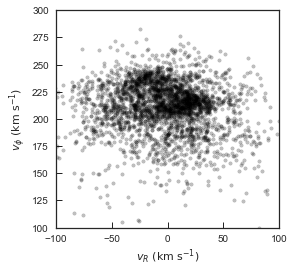

In [48]:
plt.figure(figsize=(4,4))
plt.scatter(vcyl[:,0],vcyl[:,1],alpha=0.25,marker='.',color='k')
plt.xlim(-100,100)
plt.ylim(100,300)
plt.xlabel(r'$v_R\ (\mathrm{km\ s}^{-1})$')
plt.ylabel(r'$v_{\phi}\ (\mathrm{km\ s}^{-1})$')
plt.show()

So, to turn them into actions and angles we can use one of a variety of action routines, but let's use the Staeckel aproximation here:

In [19]:
from galpy.actionAngle import actionAngleStaeckel, estimateDeltaStaeckel
rpzf = np.copy(rpz)
rpzf[:,1][rpz[:,1] > np.pi] = rpz[:,1][rpz[:,1] > np.pi] - 2*np.pi
aAS = actionAngleStaeckel(pot=MWPotential2014,delta=0.4)
deltas=estimateDeltaStaeckel(MWPotential2014,rpz[:,0]/ro,rpz[:,2]/ro,no_median=True)
e, zmax, rperi, rap = aAS.EccZmaxRperiRap(rpz[:,0]/ro, vcyl[:,0]/vo, vcyl[:,1]/vo, rpz[:,2]/ro, vcyl[:,2]/vo, rpzf[:,1]/ro, delta=deltas)
jR, lz, jz, O_R, O_phi, O_z, theta_R, theta_phi, theta_z = aAS.actionsFreqsAngles(rpz[:,0]/ro, vcyl[:,0]/vo, vcyl[:,1]/vo, rpz[:,2]/ro, vcyl[:,2]/vo, rpzf[:,1]/ro, delta=deltas)

And then plot the planar actions and angles 

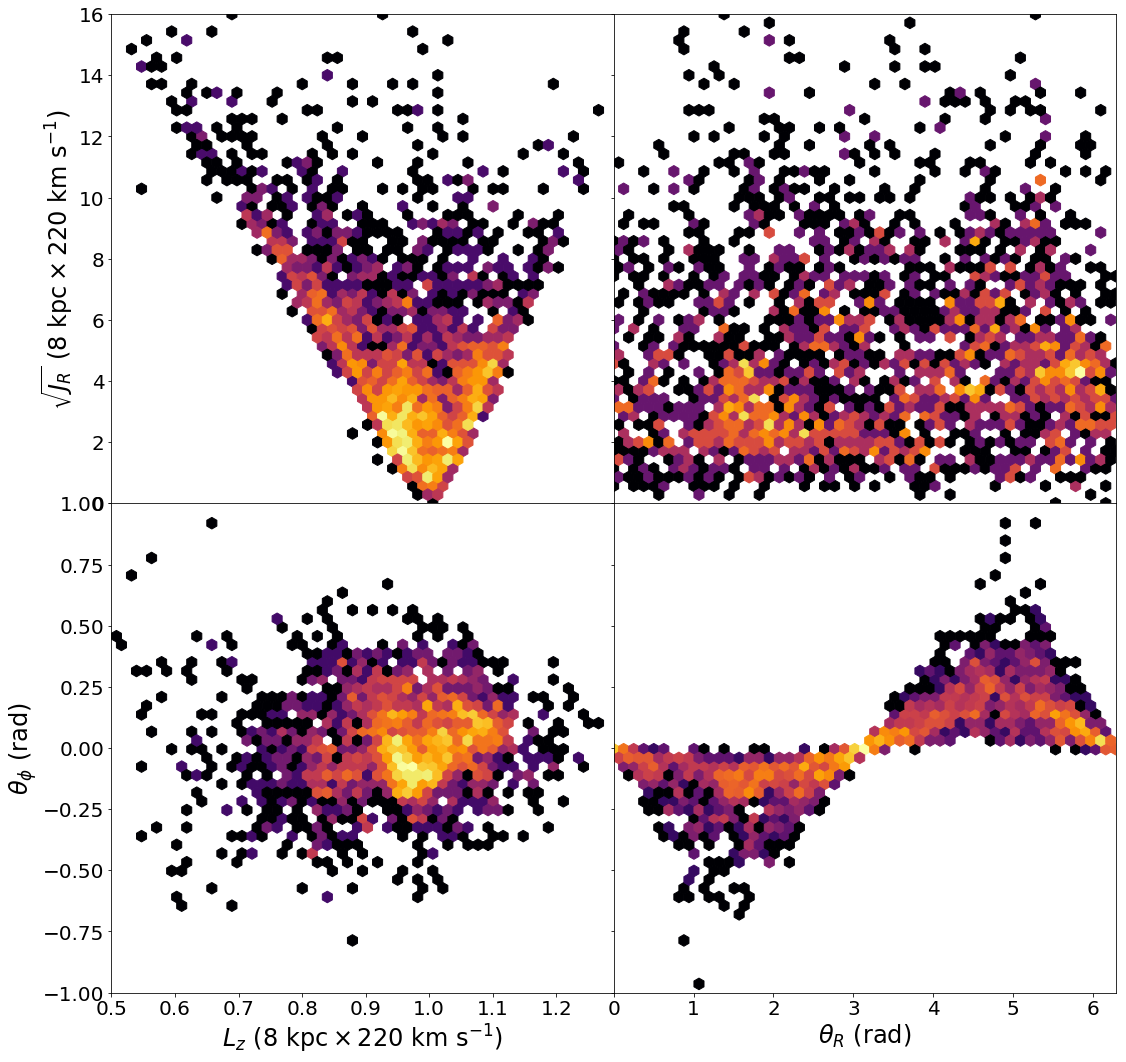

In [20]:
gs=50
ccmap='inferno'
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey='row',sharex='col',figsize=(18,18))
theta_p = np.copy(theta_phi)
theta_p[theta_phi > np.pi] = theta_phi[theta_phi > np.pi] - 2*np.pi
ax1.hexbin(lz,np.sqrt(jR*220.*8.),extent=[0.5,1.29,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax1.set_xlim([0.5,1.29])
ax1.set_ylim([0,16])
ax1.set_ylabel(r'$\sqrt{J_R}\ (8\ \mathrm{kpc}\times220\ \mathrm{km\ s}^{-1})$',fontsize=24)
ax2.hexbin(theta_R,np.sqrt(jR*220.*8.),extent=[0,2.*np.pi,0,16],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax2.set_xlim([0.,2.*np.pi])
ax2.set_ylim([0,16])
ax3.hexbin(lz,theta_p,extent=[0.5,1.29,-1,0.99],bins='log',gridsize=gs,cmap=ccmap,rasterized=True,mincnt=1)
ax3.set_xlim([0.5,1.29])
ax3.set_ylim([-1,1])
ax3.set_xlabel(r'$L_z\ (8\ \mathrm{kpc}\times220\ \mathrm{km\ s}^{-1})$',fontsize=24)
ax3.set_ylabel(r'$\theta_{\phi}\ (\mathrm{rad})$',fontsize=24)
ax4.hexbin(theta_R,theta_p,extent=[0,2.*np.pi,-1,0.99],gridsize=gs,bins='log',cmap=ccmap,rasterized=True,mincnt=1)
ax4.set_xlim([0.,2.*np.pi])
ax4.set_ylim([-1,1])
ax4.set_xlabel(r'$\theta_R\ (\mathrm{rad})$',fontsize=24)
plt.subplots_adjust(wspace=0.)
plt.subplots_adjust(hspace=0.)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# The velocity distribution from various potential models
Finally, let's look at how to construct the velocity distribution which arises from various models of the Milky Way structure. We'll use the backwards integration technique of Dehnen (2000).

In [31]:
from galpy.df import evolveddiskdf
from galpy.df import dehnendf
from scipy import ndimage as nd
from galpy.util import bovy_plot

In [56]:
from galpy.potential import LogarithmicHaloPotential
# Initialise Dehnen distribution function for the disc
dfc=dehnendf(beta=0.,correct=False,profileParams=(1./3.,1.,0.15))

# We'll just use a simple logarithmic Halo potential here
lhp=LogarithmicHaloPotential(normalize=1)

# Integrate backwards following (Dehnen 2000, AJ, 119, 800)
edf=evolveddiskdf(dfc,lhp,to=-10)

# Calculate the velocity field upon a grid
mvr, grid= edf.meanvR(1.,phi=0.,deg=False,t=0.,grid=True,returnGrid=True,gridpoints=101)

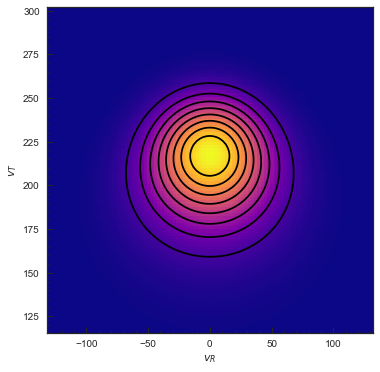

In [57]:
plt.figure(figsize=(6,6))
bovy_plot.bovy_dens2d(nd.gaussian_filter(grid.df[::-1].T,1.),
                      origin='lower',contours=True,xrange=[grid.vRgrid[0]*220.,grid.vRgrid[-1]*220.],
                      yrange=[grid.vTgrid[0]*220.,grid.vTgrid[-1]*220.],xlabel=r'$v_R$',ylabel=r'$v_T$',gcf=True,cmap='plasma')